In [109]:
#importing the necessary libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
#reading the dataset

df=pd.read_csv('../Dataset/Training.csv')
test_df=pd.read_csv('../Dataset/Testing.csv')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [112]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [113]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
# #drop unnamed column:133
# df.drop("Unnamed: 133", axis = 1, inplace = True)

In [115]:
#checking null values
df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

# Building ML models

In [116]:
#checking labels
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [210]:
# split dataset into attributes and labels
X_train = df.iloc[:,:-1].values # the training attributes
y_train = df.iloc[:,132].values # the training labels
X_test = test_df.iloc[:,:-1].values # the testing attributes
y_test = test_df.iloc[:,132].values # the testing labels
print("X_trainshape: ",X_train.shape,"y_train_shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape,"y_test.shape: ", y_test.shape)


X_trainshape:  (4962, 132) y_train_shape:  (4962,)
X_test.shape:  (42, 132) y_test.shape:  (42,)


In [118]:
# Libraries for ML model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Decision Tree Classifier

In [119]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_predDT = decision_tree.predict(X_test)
print("Train Accuracy: ",round(accuracy_score(y_train, decision_tree.predict(X_train))*100,2))
print("Test Accuracy: ",round(accuracy_score(y_test, Y_predDT) * 100 ,2))

Train Accuracy:  100.0
Test Accuracy:  100.0


# Random Forest Classifier

In [120]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_predRF = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
print("Train Accuracy: ",round(accuracy_score(y_train, random_forest.predict(X_train))*100,2))
print("Test Accuracy: ",round(accuracy_score(y_test, Y_predRF)*100,2))

Train Accuracy:  100.0
Test Accuracy:  100.0


# Logistic Regression

In [121]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_predLR = logreg.predict(X_test)
print("Train Accuracy: ",round(accuracy_score(y_train, logreg.predict(X_train))*100,2))
print("Test Accuracy: ",round(accuracy_score(y_test, Y_predLR) * 100,2))

Train Accuracy:  100.0
Test Accuracy:  100.0


In [122]:
# Tabular Representation of model accuracy of Training set
models_train = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Score': [round(accuracy_score(y_train, decision_tree.predict(X_train))*100,2),
              round(accuracy_score(y_train, random_forest.predict(X_train))*100,2),
              round(accuracy_score(y_train, logreg.predict(X_train))*100,2)]})
models_train.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,100.0
1,Random Forest,100.0
2,Logistic Regression,100.0


# Summary of various model's accuracies

In [123]:
# Tabular Representation of model accuracy of Testing set
models_test = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Score': [round(accuracy_score(y_test, Y_predDT) * 100 ,2),
              round(accuracy_score(y_test, Y_predRF)*100,2),
              round(accuracy_score(y_test, Y_predLR) * 100,2)]})
models_test.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,100.0
1,Random Forest,100.0
2,Logistic Regression,100.0


In [124]:
# plt.style.use('seaborn-darkgrid')
# plt.figure(figsize=(10, 6))
# models = ['Logistic Regression', 'Support Vector Classifier', 'Decision Tree Classifier', 
#           'K-Neighbors Classifier', 'Naive Bayes Classifier']
# test_accuracy = [lr_test, svc_test, dt_test, knn_test, nb_test]
# plt.plot(models, test_accuracy, '-o')
# plt.ylim(0.90, 1.05)
# plt.ylabel("Accuracy Score")
# plt.show()

# Method 2 : Using Keras

In [164]:
#reading the dataset

df=pd.read_csv('../Dataset/Training.csv')
test_df=pd.read_csv('../Dataset/Testing.csv')
#drop unnamed column:133
# df.drop("Unnamed: 133", axis = 1, inplace = True)

# Sequential Model

In [165]:
X_train= df.drop('prognosis', axis=1)
X_test= test_df.drop('prognosis', axis=1)

y_train= np.array(df['prognosis'])
y_test= np.array(test_df['prognosis'])

In [166]:
y_train_enc= pd.get_dummies(y_train)
y_test_enc= pd.get_dummies(y_test)

In [167]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [168]:
# !pip install keras

In [169]:
# !pip install tensorflow

In [170]:
print(keras.__version__)


2.7.0


In [171]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [172]:
#creating sequential model

model= Sequential()
model.add(Dense(64, activation='relu', input_shape= (X_train.shape[1], )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_enc.shape[1], activation='softmax'))

In [173]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                8512      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 41)                697       
                                                                 
Total params: 11,817
Trainable params: 11,817
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [175]:
# early_stopping_monitor= EarlyStopping(patience=2, monitor='val_accuracy')
# model.fit(X_train, y_train_enc, batch_size=120, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
29/29 [==============================] - 1s 7ms/step - loss: 3.6235 - accuracy: 0.1350 - val_loss: 3.4822 - val_accuracy: 0.2438
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 3.3095 - accuracy: 0.3366 - val_loss: 2.9642 - val_accuracy: 0.4385
Epoch 3/30
29/29 [==============================] - 0s 3ms/step - loss: 2.6223 - accuracy: 0.5030 - val_loss: 2.0259 - val_accuracy: 0.5850
Epoch 4/30
29/29 [==============================] - 0s 3ms/step - loss: 1.6528 - accuracy: 0.6755 - val_loss: 1.0429 - val_accuracy: 0.7542
Epoch 5/30
29/29 [==============================] - 0s 3ms/step - loss: 0.8088 - accuracy: 0.8802 - val_loss: 0.3902 - val_accuracy: 0.9745
Epoch 6/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.9928 - val_loss: 0.1099 - val_accuracy: 0.9993
Epoch 7/30
29/29 [==============================] - 0s 3ms/step - loss: 0.1076 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9993
Epoch 8/30
29/29 [==

In [176]:
# model.evaluate(X_test, y_test_enc, batch_size=1, steps=5)

5/5 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 1.0000


[0.013712214305996895, 1.0]

In [177]:
#varying the model parameters
early_stopping_monitor= EarlyStopping(patience=2, monitor='val_accuracy')
model.fit(X_train, y_train_enc, batch_size=120, epochs=40, validation_split=0.4, callbacks=[early_stopping_monitor])

Epoch 1/40
25/25 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9995
Epoch 2/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9995
Epoch 3/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9995


In [178]:
model.evaluate(X_test, y_test_enc, batch_size=1, steps=5)

5/5 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000


[0.003723522648215294, 1.0]

# Saving the Sequential model

In [179]:
# save model
model.save('disease_model.h5')

# # load model
# my_new_model = keras.models.load_model('disease_model.h5')

# Obtaining predictions

In [180]:
import copy

# create test for prediction
SYMPTOMS = {'itching': {0: 0}, 'skin_rash': {0: 0}, 'nodal_skin_eruptions': {0: 0}, 'continuous_sneezing': {0: 0}, 'shivering': {0: 0}, 'chills': {0: 0}, 'joint_pain': {0: 0}, 'stomach_pain': {0: 0}, 'acidity': {0: 0}, 'ulcers_on_tongue': {0: 0}, 'muscle_wasting': {0: 0}, 'vomiting': {0: 0}, 'burning_micturition': {0: 0}, 'spotting_ urination': {0: 0}, 'fatigue': {0: 0}, 'weight_gain': {0: 0}, 'anxiety': {0: 0}, 'cold_hands_and_feets': {0: 0}, 'mood_swings': {0: 0}, 'weight_loss': {0: 0}, 'restlessness': {0: 0}, 'lethargy': {0: 0}, 'patches_in_throat': {0: 0}, 'irregular_sugar_level': {0: 0}, 'cough': {0: 0}, 'high_fever': {0: 0}, 'sunken_eyes': {0: 0}, 'breathlessness': {0: 0}, 'sweating': {0: 0}, 'dehydration': {0: 0}, 'indigestion': {0: 0}, 'headache': {0: 0}, 'yellowish_skin': {0: 0}, 'dark_urine': {0: 0}, 'nausea': {0: 0}, 'loss_of_appetite': {0: 0}, 'pain_behind_the_eyes': {0: 0}, 'back_pain': {0: 0}, 'constipation': {0: 0}, 'abdominal_pain': {0: 0}, 'diarrhoea': {0: 0}, 'mild_fever': {0: 0}, 'yellow_urine': {0: 0}, 'yellowing_of_eyes': {0: 0}, 'acute_liver_failure': {0: 0}, 'fluid_overload': {0: 0}, 'swelling_of_stomach': {0: 0}, 'swelled_lymph_nodes': {0: 0}, 'malaise': {0: 0}, 'blurred_and_distorted_vision': {0: 0}, 'phlegm': {0: 0}, 'throat_irritation': {0: 0}, 'redness_of_eyes': {0: 0}, 'sinus_pressure': {0: 0}, 'runny_nose': {0: 0}, 'congestion': {0: 0}, 'chest_pain': {0: 0}, 'weakness_in_limbs': {0: 0}, 'fast_heart_rate': {0: 0}, 'pain_during_bowel_movements': {0: 0}, 'pain_in_anal_region': {0: 0}, 'bloody_stool': {0: 0}, 'irritation_in_anus': {0: 0}, 'neck_pain': {0: 0}, 'dizziness': {0: 0}, 'cramps': {0: 0}, 'bruising': {0: 0}, 'obesity': {0: 0}, 'swollen_legs': {0: 0}, 'swollen_blood_vessels': {0: 0}, 'puffy_face_and_eyes': {0: 0}, 'enlarged_thyroid': {0: 0}, 'brittle_nails': {0: 0}, 'swollen_extremeties': {0: 0}, 'excessive_hunger': {0: 0}, 'extra_marital_contacts': {0: 0}, 'drying_and_tingling_lips': {0: 0}, 'slurred_speech': {0: 0}, 'knee_pain': {0: 0}, 'hip_joint_pain': {0: 0}, 'muscle_weakness': {0: 0}, 'stiff_neck': {0: 0}, 'swelling_joints': {0: 0}, 'movement_stiffness': {0: 0}, 'spinning_movements': {0: 0}, 'loss_of_balance': {0: 0}, 'unsteadiness': {0: 0}, 'weakness_of_one_body_side': {0: 0}, 'loss_of_smell': {0: 0}, 'bladder_discomfort': {0: 0}, 'foul_smell_of urine': {0: 0}, 'continuous_feel_of_urine': {0: 0}, 'passage_of_gases': {0: 0}, 'internal_itching': {0: 0}, 'toxic_look_(typhos)': {0: 0}, 'depression': {0: 0}, 'irritability': {0: 0}, 'muscle_pain': {0: 0}, 'altered_sensorium': {0: 0}, 'red_spots_over_body': {0: 0}, 'belly_pain': {0: 0}, 'abnormal_menstruation': {0: 0}, 'dischromic _patches': {0: 0}, 'watering_from_eyes': {0: 0}, 'increased_appetite': {0: 0}, 'polyuria': {0: 0}, 'family_history': {0: 0}, 'mucoid_sputum': {0: 0}, 'rusty_sputum': {0: 0}, 'lack_of_concentration': {0: 0}, 'visual_disturbances': {0: 0}, 'receiving_blood_transfusion': {0: 0}, 'receiving_unsterile_injections': {0: 0}, 'coma': {0: 0}, 'stomach_bleeding': {0: 0}, 'distention_of_abdomen': {0: 0}, 'history_of_alcohol_consumption': {0: 0}, 'fluid_overload.1': {0: 0}, 'blood_in_sputum': {0: 0}, 'prominent_veins_on_calf': {0: 0}, 'palpitations': {0: 0}, 'painful_walking': {0: 0}, 'pus_filled_pimples': {0: 0}, 'blackheads': {0: 0}, 'scurring': {0: 0}, 'skin_peeling': {0: 0}, 'silver_like_dusting': {0: 0}, 'small_dents_in_nails': {0: 0}, 'inflammatory_nails': {0: 0}, 'blister': {0: 0}, 'red_sore_around_nose': {0: 0}, 'yellow_crust_ooze': {0: 0}}

LABELS = ['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']


DISEASE_MODEL = keras.models.load_model('disease_model.h5')

def get_symp_pd(symptoms_list):
    s_dict = copy.deepcopy(SYMPTOMS)
    for symp in symptoms_list:
        if symp in s_dict:
            s_dict.get(symp)[0] = 1
    # convert symptoms to pandas data frame
    s_dict = pd.DataFrame(s_dict)
    
    return s_dict

def get_disease_name(symptoms_list):
    symptoms_list = get_symp_pd(symptoms_list)
    y_prob = DISEASE_MODEL.predict(symptoms_list) 
#     print(y_prob)

#     print("Where:",np.where(y_prob[0]==max(y_prob[0])))
#     print(LABELS[14])
#     print("\nMax probability: ",max(y_prob[0]))
  
    sorted_index_array=np.argsort(y_prob[0])

    sorted_array=y_prob[0][sorted_index_array]

#     print("Sorted array:", sorted_array)

    n=3
    rslt=sorted_array[-n: ]
#     print(rslt)
#     for i in range(len(rslt)):
#         x=np.where(y_prob[0]==rslt[i])
#         print(LABELS[x[0][0]])

    y_classes = y_prob.argmax(axis=-1)

    return LABELS[y_prob[0].argmax(axis=-1)],rslt,y_prob

# Testing model on sample inputs

In [181]:
#sample symptoms input
symp_disease = [
    [['shivering', 'chills', 'watering_from_eyes'], ''],
    [['sweating', 'chest_pain'], ''],
    [['weight_loss', 'high_fever', 'yellowish_skin'], ''],
    [['skin_rash', 'pus_filled_pimples'], ''],
    [['itching', 'skin_rash'], ''],
    [['itching', 'skin_rash', 'fatigue'], ''],
    [['skin_rash', 'chills', 'joint_pain', 'pain_behind_the_eyes', 'red_spots_over_body'], ''],
   
]

for i in range(len(symp_disease)):
    if (len(symp_disease[i][0]) != 0):
        d_name,res,y_pro = get_disease_name(symp_disease[i][0])
        
        print("\n\n",i+1,". For symptoms " + str(symp_disease[i][0]))
        print("\nDisease predicted: ")
        print(d_name)
        
        print("\nTop 3 disease predictions:")
        summ=sum(res)
        for i in range(len(res)):
            x=np.where(y_pro[0]==res[len(res)-i-1])
            print(i+1,'.',LABELS[x[0][0]],", probability:",round((res[len(res)-i-1]/summ)*100,2),"%")
        



 1 . For symptoms ['shivering', 'chills', 'watering_from_eyes']

Disease predicted: 
Allergy

Top 3 disease predictions:
1 . Allergy , probability: 99.34 %
2 . Cervical spondylosis , probability: 0.37 %
3 . Dengue , probability: 0.28 %


 2 . For symptoms ['sweating', 'chest_pain']

Disease predicted: 
Heart attack

Top 3 disease predictions:
1 . Heart attack , probability: 92.53 %
2 . Pneumonia , probability: 4.01 %
3 . Malaria , probability: 3.46 %


 3 . For symptoms ['weight_loss', 'high_fever', 'yellowish_skin']

Disease predicted: 
Jaundice

Top 3 disease predictions:
1 . Jaundice , probability: 77.9 %
2 . Chronic cholestasis , probability: 12.11 %
3 . Impetigo , probability: 9.99 %


 4 . For symptoms ['skin_rash', 'pus_filled_pimples']

Disease predicted: 
Acne

Top 3 disease predictions:
1 . Acne , probability: 90.78 %
2 . Osteoarthristis , probability: 5.59 %
3 . Gastroenteritis , probability: 3.63 %


 5 . For symptoms ['itching', 'skin_rash']

Disease predicted: 
Fungal i

In [182]:
# intents = {'symptoms': []}

# dic = {'name': '','patterns': ['']}

# for lbl in list(SYMPTOMS.keys()):
#     d = copy.deepcopy(dic)
#     d['name'] = lbl
#     d['patterns'] = [lbl, ]
#     intents['symptoms'].append(d)
    
# import json

# # Serializing json   
# json_object = json.dumps(intents, indent = 4)  
# # print(json_object) 

In [183]:
# SYMPTOMS_PATTERNS = intents

# def gen_symp_list(symp_str):
#     symp_list = []
#     symp_labels = list(SYMPTOMS.keys())

#     symp_pat = copy.deepcopy(SYMPTOMS_PATTERNS)

#     for symp in symp_pat['symptoms']:
#         for pattern in symp['patterns']:
#             if pattern in symp_str:
#                 print(symp['name'])
#                 symp_list.append(symp['name'])
#                 break

#     return symp_list

# l = gen_symp_list('headache shivering pain_behind_the_eyes')

# print(l)

# Decision Tree with feature selection

In [184]:
dftrain=pd.read_csv('../Dataset/Training.csv')
dftest=pd.read_csv('../Dataset/Testing.csv')

In [185]:
# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 132].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 132].values # the testing labels

In [186]:
# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [187]:
y_predDT = classifierDT.predict(X_test)

In [188]:
# for DT model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

### Feature engineering will involve feature selection based on higher feature importance towards the chosen model. This yields a subset of features from the original set to better represent the data, thus enabling the machine learning algorithm to train faster and reducing the model's computational complexity and cost. The model can also be easier to interpret and become more comprehendible to humans, and in some cases achive improved accuracy when the right subset is chosen.

In [189]:
# identify the important features in DT
imp = classifierDT.feature_importances_
imp

array([0.03135211, 0.05388561, 0.0019985 , 0.00186955, 0.        ,
       0.01370023, 0.        , 0.0004514 , 0.        , 0.00126063,
       0.        , 0.09992167, 0.00333729, 0.00569271, 0.15803005,
       0.        , 0.        , 0.        , 0.        , 0.0004514 ,
       0.        , 0.        , 0.00073242, 0.        , 0.00717981,
       0.05820277, 0.00152457, 0.00290743, 0.00216342, 0.        ,
       0.        , 0.03256644, 0.01703098, 0.00507838, 0.03812115,
       0.068612  , 0.        , 0.0101007 , 0.01179993, 0.02418087,
       0.01167603, 0.00842171, 0.        , 0.01788486, 0.0004514 ,
       0.        , 0.        , 0.        , 0.02944219, 0.        ,
       0.00842171, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04054358, 0.00098145, 0.00107317, 0.        ,
       0.00062177, 0.        , 0.        , 0.00265589, 0.01872168,
       0.00396686, 0.        , 0.00162938, 0.        , 0.0004514 ,
       0.        , 0.00842171, 0.        , 0.00109571, 0.     

In [190]:
columns = list(dftrain.columns)
# combine list of symptoms and their feature importance into a 2D array
columns = columns[:132]
column_names = ['symptom', 'importance']
df3 = np.vstack((columns, imp)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3

,symptom,importance
0,itching,0.031352107468674534
1,skin_rash,0.05388560713367801
2,nodal_skin_eruptions,0.0019985022415703727
3,continuous_sneezing,0.001869553141872825
4,shivering,0.0
...,...,...
127,small_dents_in_nails,0.0
128,inflammatory_nails,0.008137080598496755
129,blister,0.0012955576350067593
130,red_sore_around_nose,0.0


#### Taking all of these into consideration, a minimum threshold for feature importance is set in order to identify features of low importance, and thus can be excluded from the final predictive model.

In [191]:
coefficients = classifierDT.feature_importances_

# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Decision Tree Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

In [192]:
# identify features with feature importance values below the minimum threshold
low_importance_features = np.array(df3.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'burning_micturition',
 'spotting_ urination',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'dark_urine',
 'pain_behind_the_eyes',
 'yellow_urine',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'blurred_and_distorted_vision',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'neck_pain',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'brittle_nails',
 'swoll

In [193]:
for i in columns :
    # drop low importance features
    dftrain.drop(i, axis=1, inplace=True)
    dftest.drop(i, axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   itching                   4962 non-null   int64 
 1   skin_rash                 4962 non-null   int64 
 2   chills                    4962 non-null   int64 
 3   vomiting                  4962 non-null   int64 
 4   fatigue                   4962 non-null   int64 
 5   high_fever                4962 non-null   int64 
 6   headache                  4962 non-null   int64 
 7   yellowish_skin            4962 non-null   int64 
 8   nausea                    4962 non-null   int64 
 9   loss_of_appetite          4962 non-null   int64 
 10  back_pain                 4962 non-null   int64 
 11  constipation              4962 non-null   int64 
 12  abdominal_pain            4962 non-null   int64 
 13  diarrhoea                 4962 non-null   int64 
 14  mild_fever              

In [194]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   itching                   42 non-null     int64 
 1   skin_rash                 42 non-null     int64 
 2   chills                    42 non-null     int64 
 3   vomiting                  42 non-null     int64 
 4   fatigue                   42 non-null     int64 
 5   high_fever                42 non-null     int64 
 6   headache                  42 non-null     int64 
 7   yellowish_skin            42 non-null     int64 
 8   nausea                    42 non-null     int64 
 9   loss_of_appetite          42 non-null     int64 
 10  back_pain                 42 non-null     int64 
 11  constipation              42 non-null     int64 
 12  abdominal_pain            42 non-null     int64 
 13  diarrhoea                 42 non-null     int64 
 14  mild_fever                42

The final datasets contains 33 columns of predictors, out of the original 132. These are fed into the DT model with the parameter of best split, the criterion of entropy, and the minimum number of 2 leaves. The performance metrics of test accuracy, precision, recall, and F1-score are measured again for this new model.

In [195]:
# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 33].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 33].values # the testing labels

# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [196]:
# for DT model
y_predDT = classifierDT.predict(X_test)

# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.50      1.00      0.67         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

C:\Users\sukha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



DT model has a reduced performance metrics of 95.23% test accuracy. Thus, all the prognosis are not perfectly classified and predicted.

In conclusion, the DT model using the parameter of best split, the criterion of entropy, and the minimum number of 2 leaves, is not chosen as the final model for the prediction of disease prognosis using 33 predictors of symptoms.

# Logistic Regression using feature selection

In [197]:
df=pd.read_csv('../Dataset/Training.csv')
# Split df into X and y
y = df['prognosis']
X = df.drop('prognosis', axis=1)

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [199]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 100.00%


In [200]:
coefficients = np.mean(model.coef_, axis=0)
coefficients

array([-3.84516267e-16, -7.24014344e-16,  4.00424951e-16, -4.10960222e-16,
       -2.18913641e-16, -1.82239048e-15, -2.19336744e-16,  7.89510733e-17,
        2.18786710e-16, -1.30273502e-16,  1.91496548e-16,  3.89931989e-16,
        4.92999950e-16,  2.91645096e-16, -2.54538937e-15, -9.37300711e-16,
        2.82357978e-16, -9.61174314e-16, -1.50370908e-16, -5.21432491e-16,
        5.69200852e-16, -1.62945538e-15,  2.73451654e-16, -3.03587186e-16,
       -1.42264249e-15, -1.85894660e-15, -1.49101598e-16, -8.21835824e-16,
       -1.11699268e-16, -1.75334002e-16,  9.24903785e-16, -1.25915538e-16,
        1.00461644e-15,  5.30740763e-16,  1.55431223e-15, -3.00572575e-16,
       -5.05862290e-16, -2.11890126e-16,  1.44769021e-15,  1.62742448e-15,
        2.17170455e-15, -2.49123215e-16,  2.86864028e-17,  2.30168188e-16,
        1.34716087e-16,  0.00000000e+00,  4.09056258e-16, -1.38921733e-15,
       -2.43504404e-15,  4.96215535e-16, -1.48796964e-15, -2.70828414e-16,
       -2.70828414e-16, -

In [201]:
importance_threshold = np.quantile(np.abs(coefficients), q=0.25)

fig = px.bar(
    x=coefficients,
    y=X_train.columns,
    orientation='h',
    color=coefficients,
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    labels={'x': "Coefficient Value", 'y': "Feature"},
    title="Feature Importance From Model Weights"
)

fig.add_vline(x=importance_threshold, line_color='yellow')
fig.add_vline(x=-importance_threshold, line_color='yellow')
fig.add_vrect(x0=importance_threshold, x1=-importance_threshold, line_width=0, fillcolor='yellow', opacity=0.2)

fig.show()

In [202]:
low_importance_features = X_train.columns[np.abs(coefficients) < importance_threshold]
low_importance_features


Index(['shivering', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue', 'muscle_wasting', 'mood_swings', 'sunken_eyes',
       'sweating', 'dehydration', 'headache', 'back_pain', 'yellow_urine',
       'acute_liver_failure', 'fluid_overload', 'neck_pain', 'swelling_joints',
       'weakness_of_one_body_side', 'bladder_discomfort',
       'foul_smell_of urine', 'muscle_pain', 'altered_sensorium',
       'abnormal_menstruation', 'receiving_blood_transfusion',
       'receiving_unsterile_injections', 'coma', 'stomach_bleeding',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'blister', 'yellow_crust_ooze'],
      dtype='object')

In [205]:
reduced_data = df.drop(low_importance_features, axis=1).copy()
y = reduced_data['prognosis']
X = reduced_data.drop('prognosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [206]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,chills,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,...,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,red_sore_around_nose
1237,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1565,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1238,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2763,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
905,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3980,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
reduced_data_model = LogisticRegression()
reduced_data_model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(reduced_data_model.score(X_test, y_test) * 100))

Test Accuracy: 99.19%


In [208]:
y_pred = reduced_data_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

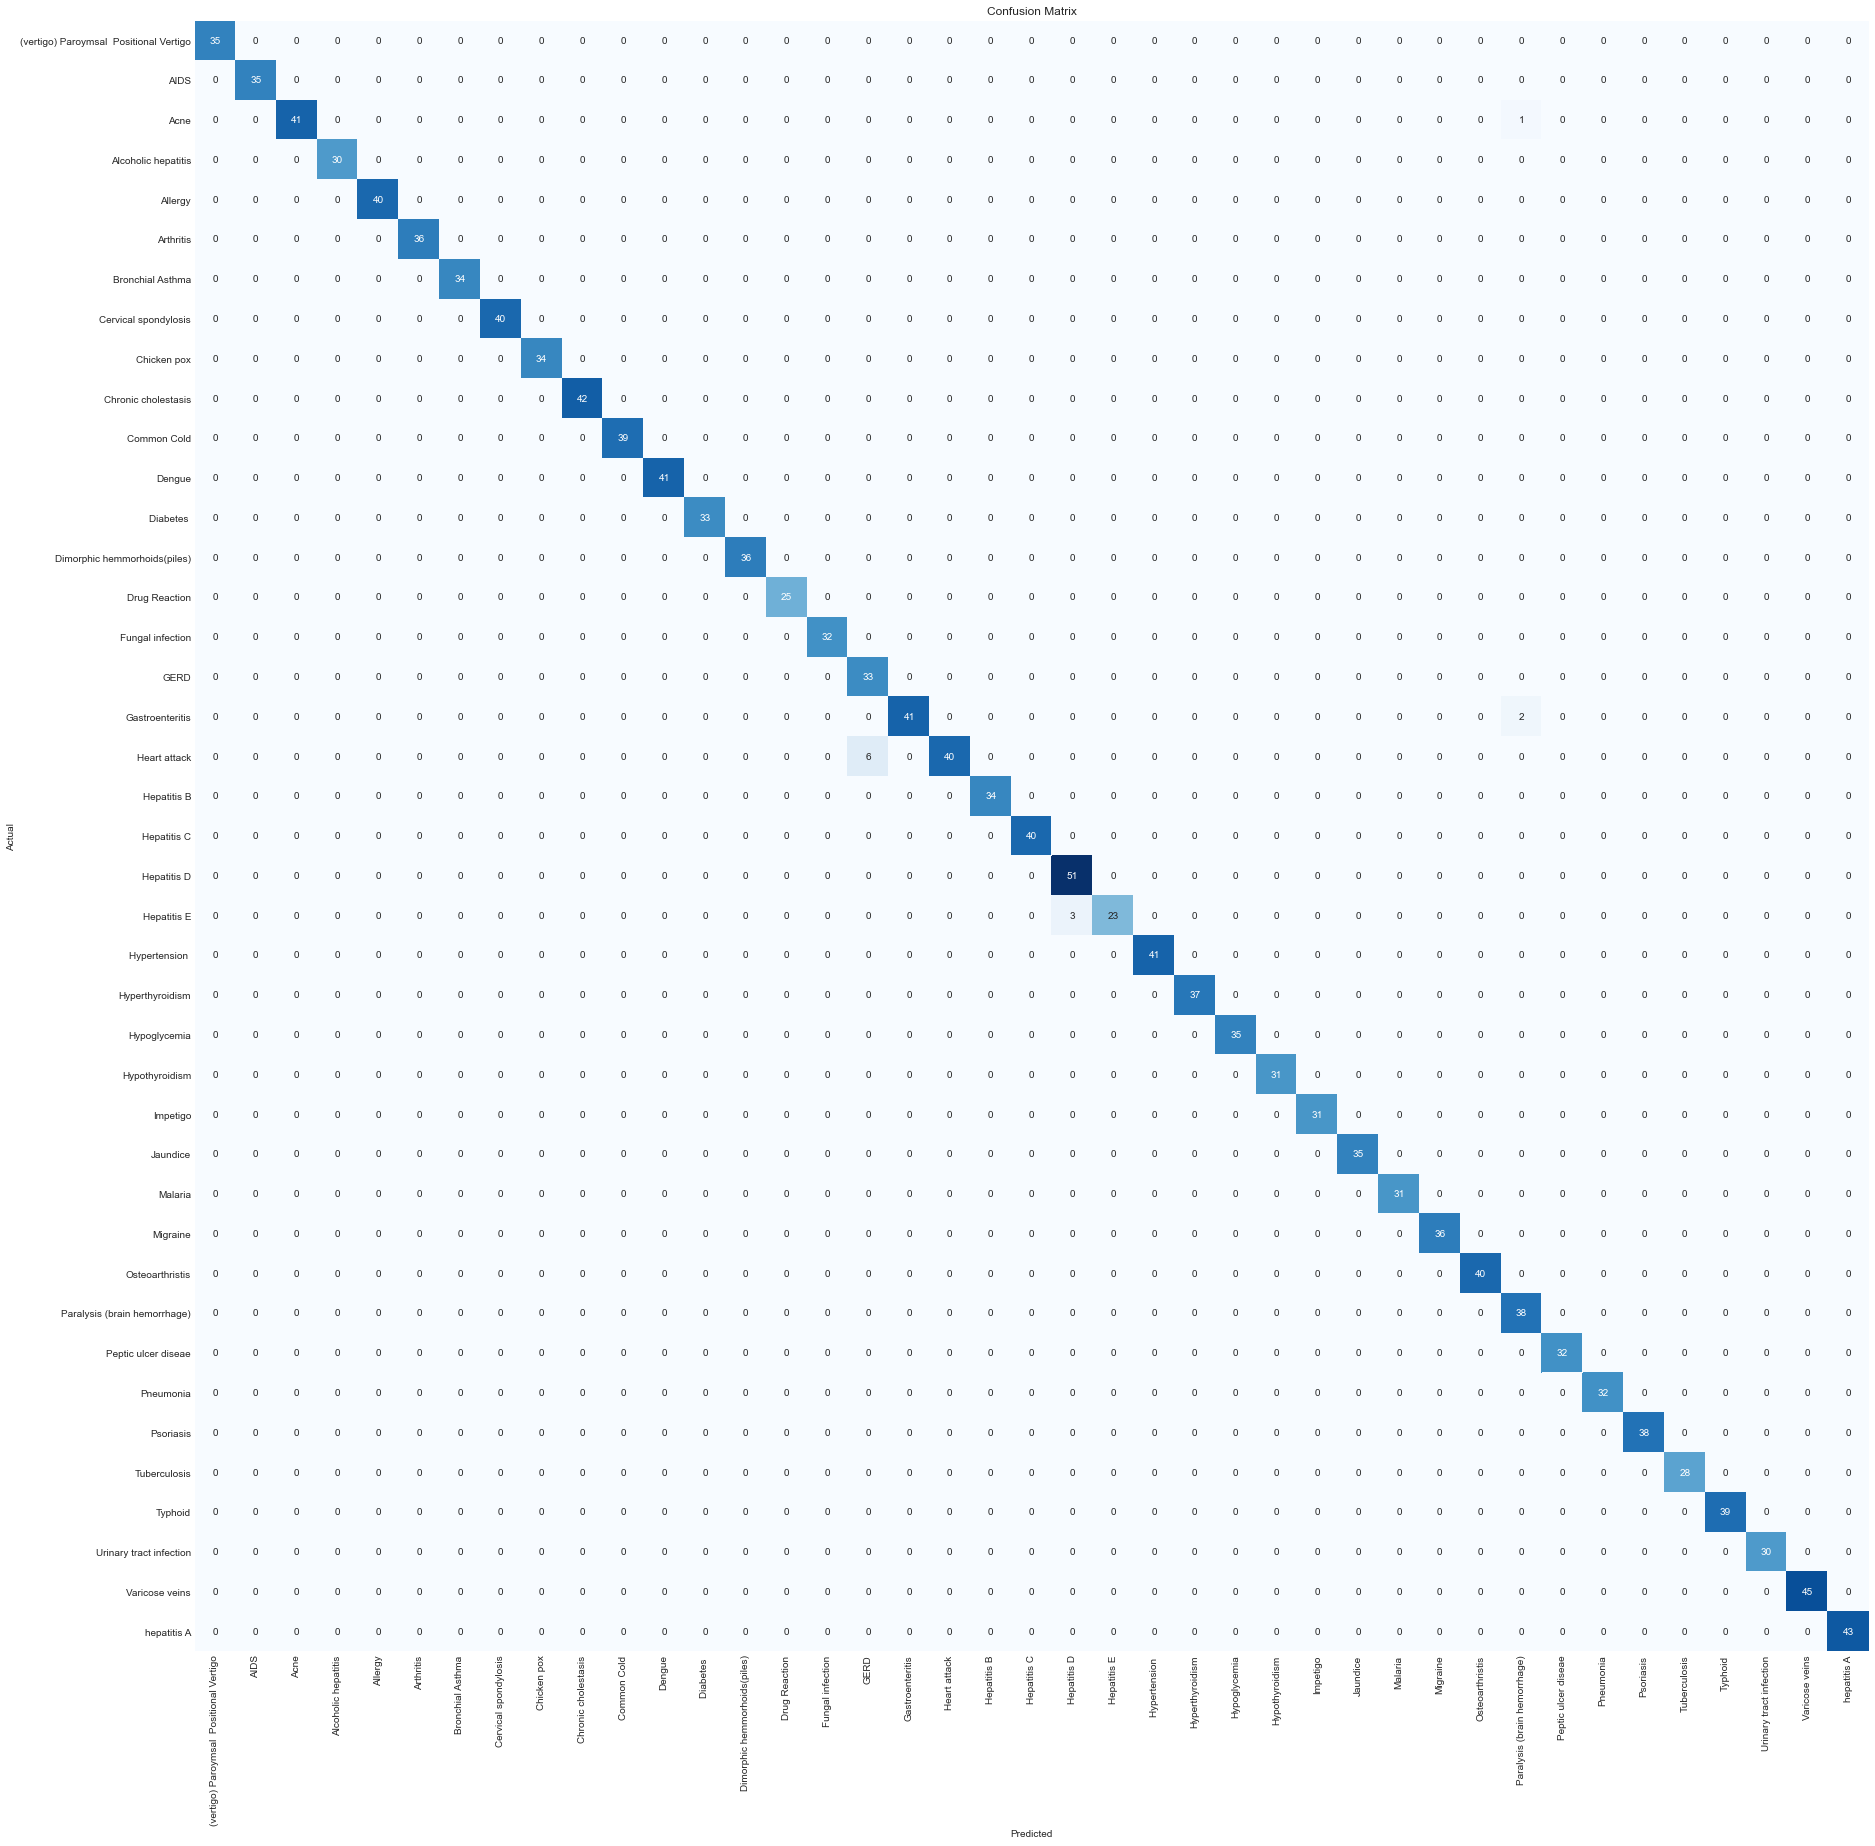

In [209]:
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(np.arange(41) + 0.5, reduced_data_model.classes_, rotation=90)
plt.yticks(np.arange(41) + 0.5, reduced_data_model.classes_, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [1]:
import pandas as pd
data = [['Logistic Regression', 99.19], ['Decision Tree', 90.47], ['ANN Sequential Model', 99.9963]]
df = pd.DataFrame(data, columns = ['Model Name', 'Accuracy'])
df

,Model Name,Accuracy
0,Logistic Regression,99.1900
1,Decision Tree,90.4700
2,ANN Sequential Model,99.9963


In [2]:
import matplotlib.pyplot as plt 
df.boxplot(by ='Model Name', column =['Accuracy'], grid = False)

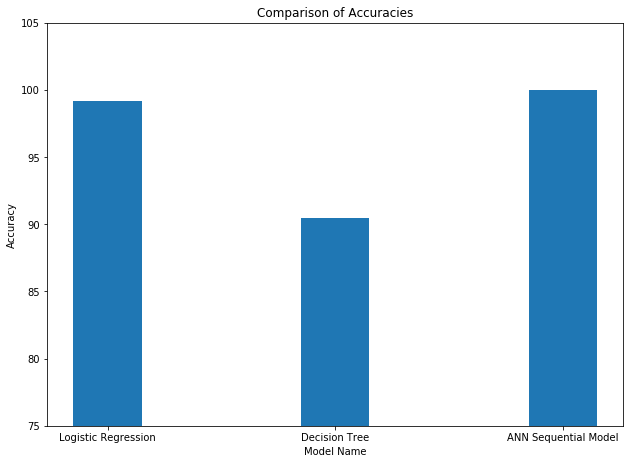

<Figure size 432x288 with 0 Axes>

In [3]:
from matplotlib import pyplot as plt

mn = df['Model Name']
acc = df['Accuracy']
 
fig = plt.figure(figsize =(10, 7), linewidth=0.5)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlabel('Model Name')
axes.set_ylabel('Accuracy')
axes.set_title('Comparison of Accuracies')
plt.bar(mn, acc, width=0.3)
axes.set_ylim([75,105])
plt.show()
plt.tight_layout()

In [4]:
fig.savefig("bar.png", dpi=100)